In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import random
import tensorflow as tf
import cv2

2022-11-09 15:15:10.615050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 15:15:10.783128: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-09 15:15:10.793740: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-09 15:15:10.793760: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# Create Image Object
class Image():
    def __init__(self, path):
        self.path = path
        self.set = path.split('/')[-3]
        self.plant = path.split('/')[-2]
        self.name = path.split('/')[-1]

    def remove_background(self):
        colored_image = cv2.imread(self.path)
        grey_image = cv2.cvtColor(colored_image, cv2.COLOR_RGB2GRAY)
        for _ in range(3):
            grey_image = cv2.GaussianBlur(grey_image, (51, 51), 0)
        _, thresh = cv2.threshold(grey_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Apply mask to colored_image
        colored_image = cv2.bitwise_or(colored_image, colored_image, mask=cv2.bitwise_not(thresh))
        self.image = colored_image

dataset/Test/magnolia/magnolia074.jpg


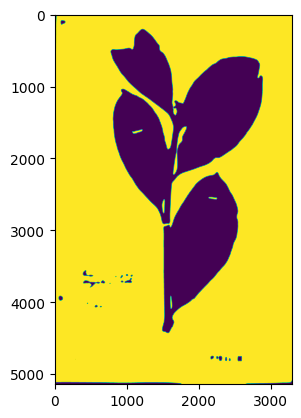

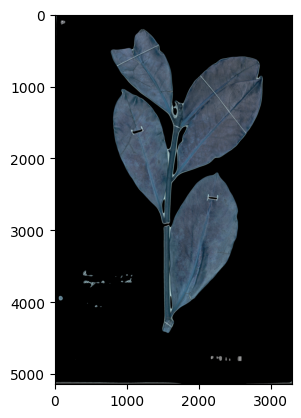

dataset/Test/magnolia/magnolia072.jpg


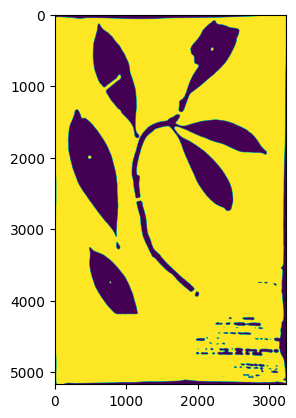

KeyboardInterrupt: 

In [3]:
# Charger les données
images = []

for set in os.listdir('dataset/'):
    for plant in os.listdir('dataset/'+set+'/'):
        for image in os.listdir('dataset/'+set+'/'+plant+'/'):
            print('dataset/'+set+'/'+plant+'/'+image)
            img = Image('dataset/'+set+'/'+plant+'/'+image)
            img.remove_background()
            images.append(img)        

In [ ]:
print('Nombre d\'images chargées :', len(images))
